In [48]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

In [56]:
%load_ext rpy2.ipython

<h1><center>Linear Model Selection and Regularization</center></h1>

Befor moving to non-linear models, there are certain other fitting procedures through which a plain linear model can be improved. These alternate fitting procedures can yield better <b>prediction accuracy</b> and <b>model interpretability</b>.

 - <b>Prediction Accuracy:</b> Provided that the relationship between predictors and response is linear, the <b>least square estimates will have low bias</b>. If n >> p, this model will have low variance as well. If n is not much larger than p, the model will have a lot of variability, resulting in overfitting and poor prediction accuracy. If p > n, the variance is almost infinite and hence the plain least square method can not be used at all.
 
 
 - <b>Model Interpretability:</b> There may be the case that some of the predictors used in the linear model are not significant. Including such <b>irrelevant variables</b> may lead to unnecessary complexity in the model. These variables can be excluded from the model by <b>feature selection</b> or <b>variable selection</b> and hence a better model interpretability.
 
Some methods that can be used to improve least square fit are:

 - <b>Subset Selection:</b> The predictors that are statistically significant are identified and the model using least squares is then fit on these reduced set of variables.
 
 
 - <b>Shrinkage:</b> The model is fit using all $p$ predictors and later on the estimated coefficients are shrunken towards 0 relative to the least square estimates. This shrinkage (also called as <b>regularization</b>) can reduce the variance and hence results in better fit.
 
 
 - <b>Dimension Reduction:</b> This method can be used to project the $p$ predictors into a $M$-dimensional space, where $M < p$. These $M$ predictors are then used to fit a least squares linear regression model.

### 6.1 Subset Selection

#### 6.1.1 Best Subset Selection

In <b>best subset selection</b>, a seperate least squares regression is fitted for each possible combination of $p$ predictors. We then identify the best model out of these. The algorithm for this is as follows:


 - Let $M_0$ denotes the <b>null model</b>, which contains no predictors. This model simply predicts the sample means of each observation.
 
 - For $K=1, 2, ..., p$, all $\dbinom{p}{k}$ models are fitted and the best among them is denoted as $M_k$. The bset is the one which has the <b>smallest RSS</b> or <b>largest R$^2$</b>.
 
 - Single best model out of $M_0, M_1, ..., M_k$ is selected using <b>cross-validation, AIC, BIC</b> or <b>adjusted R$^2$</b>.
 
 
After first two steps, the problem is reduced from $2^p$ possible models to $p+1$ possible models. Selecting one of the best models out of these $p+1$ models can be misleading. As number of predictors in the model increases, the <b>RSS monotonically decreases</b> and <b>R$^2$ monotonically increases</b> (as they depend on training error and training error improves as we keep on adding new predictors). Hence, we need to choose a model based on <b>test error</b>. This is the reason <b>cross-validation, $C_p$, BIC</b> or <b>adjusted R$^2$</b> is used in this step.

In the best subset selection for logistic regression, insted of RSS or R$^2$, we use the <b>deviance</b>. Deviance is negative two times the maximized log-likelihood. The <b>smaller the deviance, the better the fit</b>. For large number of predictors, best subset selection is <b>computationally inefficient</b>.

#### 6.1.2 Stepwise Selection
##### Forward Stepwise Selection

<b>Forward Stepwise Selection</b> begins with no predictors and then add them to the model one-at-a-time, until all the predictors are in the model. At each step, the variable that gives the greatest <b>additional</b> improvement to the fit is added to the model. The algorithm is as follows:

 - Let $M_0$ denotes the null model.
 - Add a single predictor to the model which gives the <b>smallest RSS</b> or <b>largest R^$2$</b> for it. The model is denoted as $M_1$.
 - Gradually get the models $M_0, M_1, M_2, ... , M_p$ by following the same procedure.
 - Select the single best model out of these based on <b>cross-validation, C$_p$, BIC</b> or <b>adjusted R$^2$</b>.
 

For $p$ predictors, the forward stepwise selection requires fitting of $1+\frac{p(p+1)}{2}$ models. This is a substantial improvemenet over best subset selection. Though forward stepwise selection do well in practice, it does not guarantee the selection of best possible model out of all the possible $2^p$ models as all of them are not analyzed in this case.

Forward stepwise selection can be applied in the case when $n<p$ as well. But in this case the constructed sub-models range from $M_0$ to $M_{n-1}$, as least square method does not give a unique solution if $p \geq n$.

##### Backward Stepwise Selection

<b>Backward Stepwise Selection</b> begins with the model containing all the $p$ predictors and it iteratively removes the least useful predictor one at a time. The algorithms is similar to the ones descibed above. Like forward stepwise selection, we need to fit only $1+\frac{p(p+1)}{2}$ models in backward stepwise selection. It does not guarantee to yield the best model as well. As in this case, we start from fitting the model with all the $p$ predictors, it is needed that: $n > p$.

##### Hybrid Approaches

In <b>Hybrid Approaches</b>, forward and backward stepwise selection are used to mimic best subset selection. In this method while doing forward stepwise selection, the least significant predictor (the variable that no longer provide any improvement in the model fit) is removed as well.

#### 6.1.3 Choosing the Optimal Model

In the last step of the algorithms described above, we need to choose the best model out of possible $(p+1)$ models. If we do this selection based on the parameters which are derived on the basis of training error (RSS or R$^2$), we will always end up selecting the model which has all the parameters. For the selection of the best model on the basis of <b>test error</b>, test error can be estimated as:

 - By doing <b>adjustment</b> to the training error.
 - can be directly estimated using a cross-validation approach.

##### $C_p$, AIC, BIC, and Adjusted R$^2$

In general, <b>training MSE</b> (MSE = $\frac{RSS}{n}$) is an underestimate of test MSE and hence the training RSS and R$^2$ can not be used to select the best model out of all possible ones. There are several techniques that can be used for <b>adjusting</b> the training error to get an estimate of test error. Some of these are : <b>$C_p$, Akaike information criterion (AIC), Bayesian information criterion (BIC)</b> and <b>Adjusted R$^2$</b>.

$C_p$ estimate of the test MSE is given as:

$$C_p = \frac{1}{n}(RSS + 2d\widehat{\sigma}^2)$$

where $d$ is the number of predictors and $\widehat{\sigma}^2$ is the estimate of the variance of error $\epsilon$ associated with each response in the linear model given as:

$$Y = \beta_0 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon$$

The penality added is $2d\widehat{\sigma}^2$, which increases as the number of predictors increases. <b>If $\widehat{\sigma}^2$ is an unbiased estimator of $\sigma^2$, then $C_p$ is an unbiased estimate of test MSE.</b> Finally,  model with the lowest value of $C_p$ is chosen.

The <b>AIC</b> criterion is used for the models fit by maximum likelihood. AIC is given as:

$$C_p = \frac{1}{n\widehat{\sigma}^2}(RSS + 2d\widehat{\sigma}^2)$$

where the terms has the same meaning as explained above. $C_p$ and AIC are proportional to each other.

<b>BIC</b> is derived from a Bayesian point of view. For a least square model, BIC is given as:

$$BIC = \frac{1}{n}(RSS + log(n)d\widehat{\sigma}^2)$$

As instead of 2, BIC has a factor of $log(n)$, for values of $n>7$, BIC ends up penalizing models with higher predictors more and hence results in a selection of smaller models than $C_p$.

The <b>Adjusted R$^2$</b> statistic is another measure for model selection. $R^2$ is defined as $1 - \frac{RSS}{TSS}$, where RSS is <b>Residual sum of squares</b> and TSS is <b>Total sum of squares</b>. TSS is given as $\sum(y_i - \bar{y})^2$. For a least squares model with $d$ predictors, Adjusted R$^2$ statistic is given as:

$$Adjusted \ R^2 = 1 - \frac{RSS/(n-d-1)}{TSS/(n-1)}$$

A <b>large value of adjusted R$^2$ indicates smaller test error</b>. The concept behind adjusted R$^2$ is the fact that once the model is saturated (in terms of predictor), adding more predictors will only decrease RSS by a lower value but as the denominator $(n-d-1)$ decreases by a larger proportion, the value $\frac{RSS}{n-d-1}$ will overall increase, decreasing the value of adjusted R$^2$.

Here the expression for AIC, BIC and $C_p$ is given for linear model fit with least squares. The general expression for them can be computed as well.

##### Validation and Cross-Validation

Instead of computing the above parameters, we can directly estimate the test error by cross-validation methods. This process has an advantage comared to the methods discussed above as it provides a direct estimate of the test error and makes fewer assumption about the underlying model. It can also be used in the cases when it is hard to identify the number of predictors in the model or estimation of error variance $\sigma^2$ is difficult.

<b>As the estimate of test MSE depends on the validation set or the method of cross-validation(the estimate will be different fro 5-fold and 10-fold cross-validation), for the models with slight variance in the estimated test MSE across the variation in the number of predictors, there is a chance that if the validation process is repeated with different split of data, the model selection will change.</b> For this reason, we follow <b>one-standard-error rule</b>. The rule suggests that the lowest point in the curve for the estimated test MSE is found, and eventually, the smallest model (model with smallest number of predictors) for which the estimated test error is within one standard error away from the lowest point is selected as the best model.

### 6.2 Shrinkage Methods

As an alternative to subset selection methods, a model containing all the <b>$p$ predictors</b> can be fit using a technique that <b>constrains</b> or <b>regularizes</b> the coefficient estimates (or <b>shrinks</b> the coefficeint estimates towards 0). Two best known techniques for shrinking the coefficient estimates towards 0 are: <b>ridge regression</b> and the <b>lasso</b>. 

#### 6.2.1 Ridge Regression

In a least squares fitting, the parameters of the model is estimated by minimizing

$$RSS = \sum_{i=1}^{n} \bigg( y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})\bigg)^2$$

In <b>ridge regression</b>, coefficients are estimated by minimizing the following term instead:

$$RSS + \lambda \sum_{j=1}^{p} \beta_j^2 = \sum_{i=1}^{n} \bigg( y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})\bigg)^2 + \lambda \sum_{j=1}^{p} \beta_j^2$$

where $\lambda \geq 0$ is called as the <b>tuning parameter</b> and is determined separately. In ridge regression, the model fits the data well by minimizing RSS and <b>shrinking penalty</b> ($\lambda \sum_{j=1}^{p} \beta_j^2$). Shrinking penalty will be small when $\beta_i$s will be close to 0 and hence minimizing this has the effect of shrinking the coefficient estimates towards 0. When the <b>tuning parameter</b> $\lambda$ is 0, ridge regression will give the least squares estimates. For the larger value of $\lambda$, the impact of shrinkage penalty increases and hence the coefficient estimates approach closer to 0. We can generate different sets of coefficient estimates for different values of $\lambda$. The best estimate can be chosen using several cross-validation methods. It is to be noted that the <b>shrinkage penalty is not applied to the intercept</b>.

When value of $\lambda$ is very large, all the ridge regression coefficients approach 0, giving us the <b>null model</b> (model whic contain only intercept and no predictors). In aggregate, the ridge regression coefficients tend to decrease as $\lambda$ increases but some of the individual coefficients may increase. This phenomenon is shown in the left hand side figure below.

<img src="images/ridge.PNG"  width="1000px">

Instead we can plot the ridge coefficients against the ratio of <b>l$_2$ norms</b> of the ridge coefficients vector and least squares regression coefficients vector (intercept is excluded). Its value ranges from 1 (when $\lambda = 0$, the ridge coefficients and least squares coefficients are same) to 0 (when $\lambda = \infty$, ridge coefficients aprroach 0). This plot is shown in the right hand side figure above.

The standard least squares coefficients are <b>scale invariant</b>. This means that multiplying a predictor by a constant $c$, has an effect of scaling down the least squares coefficients by $\frac{1}{c}$. In contrast, when multiplying a predictor by $c$, the ridge coefficient changes substantially. Hence, <b>it is best to apply the ridge regression after standardizing the predictors</b> as:

$$\tilde{x_{ij}} = \frac{x_{ij}}{\sigma_j} = \frac{x_{ij}}{\sqrt{\frac{1}{n}\sum_{i=1}^{n} (x_{ij} - \bar{x_j})^2}}$$

Here the denominator is the <b>estimated standard deviation of the $j$th predictor</b>.

##### Why Does Ridge Regression Improve Over Least Squares?

In ridge regression, as $\lambda$ increases, the fliexibility of the model decreases, leading to low variance and hence increased bias. The model with least squares coefficient estimates(corresponding to $\lambda = 0$), has high variance but there is less bias. But as $\lambda$ increases, the shrinkage of the model coefficients leads to a substantial decrease in the model variance with a slight increase in the bias. As $\lambda$ increases further, the decrease in variance is surpassed by the increase in bias. Hence, <b>minimum MSE is achieved at an intermediate value of $\lambda$</b>.

#### 6.2.2 The Lasso

The ridge regression has one disadvantage though. The ridge regression model will always have all the $p$ predictors (though it will shrink their coefficeints towards 0) until and unless $\lambda$ is $\infty$. It may not be a problem when prediction accuracy is concerned but for the <b>model interpretability</b>, it can create a challenge.

The <b>lasso</b> is an alternative for ridge regression that overcomes this disadvantage. The lasso coefficients minimize

$$RSS + \lambda \sum_{j=1}^{p} |\beta_j| = \sum_{i=1}^{n} \bigg( y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})\bigg)^2 + \lambda \sum_{j=1}^{p} |\beta_j|$$

The only difference between lasso and ridge regression is that the lasso uses $l_1$ penalty instead of an $l_2$ penalty used in the ridge regression. Lasse shrinks some of the coefficients to exactly equal to 0 for larger values of $\lambda$ and hence performing <b>variable selection</b>. As a result lasso can provide <b>sparse</b> models (model with fewer predictors) which are easy to interpret.

##### Another Formulation for Ridge Regression and the Lasso

It can be shown that the lasso and ridge regression coefficient estimates solve the problems

$$minimize_{\beta}\bigg [ \sum_{i=1}^{n} \bigg( y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})\bigg)^2 \bigg] \ \ \   subject \ to \  \sum_{j=1}^{p} |\beta_j| \leq s$$

$$minimize_{\beta}\bigg [ \sum_{i=1}^{n} \bigg( y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})\bigg)^2 \bigg] \ \ \   subject \ to \  \sum_{j=1}^{p} \beta_j^2 \leq s$$

respectively. This can be interpreted as: for every value of $\lambda$ there is some $s$ that the above equations will give the lasso and ridge regression coefficients. 

For 2 predictor case, the above equation can be interpreted as: <b>the lasso and ridge coefficient estimates have the smallest RSS out of all points that lie within $|\beta_1| + |\beta_2| \leq s$ and $\beta_1^2 + \beta_2^2 \leq s$ respectively</b>. Similarly, the subset selection problem can be summarized as:

$$minimize_{\beta}\bigg [ \sum_{i=1}^{n} \bigg( y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})\bigg)^2 \bigg] \ \ \   subject \ to \  \sum_{j=1}^{p} I(\beta_j \neq 0) \leq s$$

For large values of $p$, solving the subset selection problem is infeasible as we need to consider all the possible combinations ${p\choose s}$ for this. Lasso and ridge regression can be viewed as a simplified form for this.

##### The Variable Selection Property of the Lasso

<img src="images/lasso.PNG"  width="800px">

Above figure explains why estimated lasso coefficients can be 0. In the above figure, the least squares solution is marked as $\widehat{\beta}$ and the lasso and ridge regression constraints are marked as diamond and circle respectively. The ellipses that are centered around $\widehat{\beta}$ represents regions of constant RSS. As the ellipse expands away from least squares regression coefficient, RSS increases. <b>The lasso and ridge regression coefficients are given by the points at which an ellipse contacts the region defined by the constraint.</b> As the contour of ridge regression constraint does not have any sharp edges, an ellipse will never cross it at one of the axises and hence will never give a single 0 coefficient value. But, as the lasso constraint contour has corners at each of the axis, the ellipse will often intersect the constraint at one of the axes giving the 0 value for the coefficient.

##### Comparing the Lasso and Ridge Regression

Neither ridge regression nor the lasso will universally dominate the other. The lasso will perform better in the setting where a relatively samll number of predictors are statistically significant. If all the predictors have coefficients of equal magnitude, ridge regression will perform better. But the number of predictors that are related to the response is not known in advance, we need to cross-validate the model and then choose the best one.

<b>Ridge regression shrinks every dimenion of the data by same proportion. Lasso shrinks every coefficient towards 0 by same amount and the smaller coefficients are shrinken all the way to 0.</b>

##### Bayesian Interpretation for Ridge Regression and the Lasso

A Bayesian viewpoint of regression assumes that the coefficient vector $\beta$ has some <b>prior distribution</b>,  $p(\beta)$. Then the likelihood of data can be represented as $f(Y \ | \ X, \beta)$. Multiplying the prior distribution from the likelihood gives us <b>posterior distribution</b>:

$$p(\beta | X,Y) \propto f(Y \ | \ X, \beta)\   p(\beta|X) = f(Y \ | \ X, \beta)\ p(\beta)$$

Let us assume that the prior distribution of $\beta$ is given by the density function $g$, then $p(\beta) = \prod_{j=1}^{p} g(\beta_j)$.


 - If $g$ is a <b>Gaussian distribution</b> with mean 0 and standard deviation some function of $\lambda$, the <b>posterior mode</b> of $\beta$ gives the ridge regression coefficient. The ridge regression coefficient is also the posterior mean.
 
 
 - If $g$ is a <b>double exponential(Laplace) distribution</b> with mean 0 and scale parameter some function of $\lambda$, the <b>posterior mode</b> of $\beta$ gives the lasso coefficient.

#### 6.2.3 Selecting the Tuning Parameter

To design a better model, we need to select proper <b>tuning parameter</b> $\lambda$ or the <b>constraint</b> $s$. Cross-validation provides a concrete process to handle this. We can fit the models for different values of $\lambda$, and, by the process of cross-validation, select the best of it. Finally the model is fitted for the selected value of $\lambda$ using all the available observations.

### 6.3 Dimension Reduction Methods

Instead of performing a least squares regression on all the $p$ predictors, we can <b>transform</b> the predictors and then fit a least squares model on the transformed variables. Let the transformed variables be $Z_1, Z_2, ..., Z_M$, where $M < p$, where each of $Z_m$s is a linear combination of predictors $X_1, X_2, ..., X_p$.i.e.

$$Z_m = \sum_{j=1}^{p} \phi_{jm}X_j$$

We can then fit the least squares regression model as $Z_m$s as the predictors:

$$Y = \theta_0 + \theta_1 Z_1 + ... + \theta_M Z_M + \epsilon$$

If the transformation constants are chosen wisely, then the dimensionality reduction approach can outperform plain least squares models. The term <b>dimensionality reduction</b> comes form the fact that instead of predicting $p+1$ coefficients, we only need to predict $M+1$ coefficients now. The least square coefficients can be derived from the transformation constants and the coefficients of the dimensionality reduction model as:

$$\beta_j = \sum_{m=1}^{M} \theta_m \phi_{jm} $$

Dimensionality reduction reduces the variance of the model. It works in two steps: first the transformed predictors $Z_1, Z_2, ... , Z_M$ are obtained and then the model is fitted using these $M$ predictors. Dimesionality reduction can be achieved by: <b>principal componenets</b> and <b>partial least squares</b>.

#### 6.3.1 Principal Components Regression

<b>Principal Component Analysis (PCA)</b> can be used to derive a low-dimensional set of features from a large set of variables. The <b>first principal component</b> is the direction of the data along which the observations <b>vary the most</b>. For a two variable case, the linear combination of the variables can be written as $\phi_{11} X_1 + \phi_{21} X_2$, where $\phi_{11}^2 + \phi_{21}^2 = 1$. The idea of PCA is to find the linear combination for which the variance is maximum out of all the possible ones. It is necessary to put a constraing of $\phi_{11}^2 + \phi_{21}^2 = 1$, as otherwise, variance can simply be increased by increasing the $\phi$s. <b>First principal componenet</b> can also be described as the line which is as close as possible to the data.

The <b>second principal component</b> can be described as the linear combinations of variables that is <b>uncorrelated to the first principal component $Z_1$</b> (this means that it should be <b>orthogonal</b> to the fisrt principal component) and have the largest variance.

##### The Principal Components Regression Approach

The <b>principal components regression (PCR)</b> approach constructs the first $M$ principal components first and then fit a least squares linear regression model on them. The basic idea behind the PCR is the fact that the <b>directions in which the predictors $X_1, X_2, ..., X_p$ shows the most variation are the directions that should be associated with the response $Y$</b>. Hence PCR can give better results over least square linear regression model by <b>mitigating overfitting</b>. As the number of principal components in a model is increased, the bias will decrease and the variance will increase. Performing PCR with appropriate number of principal components can improve the performance of the model compared to the least squares linear regression model.

PCR is a method of performing regression using $< p$ predictors but it is not a feature selection method as all the $p$ features are contained in $M$ principal components and hence <b>PCR is closely related to ridge regression</b>. One can even think of ridge regression as a continuous version of PCR.

In PCR, the desired number of principal components can be chosen by cross-validation. Prior to performing PCR, we need to standardize the individual variables as if we do not do so, the variables with higher variance will tend to affect the principal components obtained and hence will have an effect on the PCR model.

#### 6.3.2 Partial Least Squares 

In PCR, the linear combinations or directions are identified in an <b>unsupervised way</b> (as the response $Y$ is not used to determine the principal components). Hence, it may be the case that the directions that best describe the predictors are the ones which best describe the response. In this case, the performance will PCR will suffer.

<b>Partial least squares (PLS)</b> is a <b>supervised</b> alternative to PCR. PLS identifies the new features (dimensionality reduction) in a supervised way (it makes the use of response $Y$ in the identification of the new features). In a nut shell, <b>PLS attempts to find directions that explain both the response and the predictors.</b>

In PLS, the <b>first principal component</b> is computed by setting the <b>transformation coefficients ($\phi_{j1}$)</b> as the <b>coefficient of the simple linear regression</b> of response $Y$ onto individual variables $X_j$. Hence, PLS gives the highest weights to the variables that are most strongly related to the response while doing the transformation.

Second PLS direction is identified by removing from each of the variables $X$s, the part which is already explained by $Z_1$. This can be done by <b>regressing the each variable on $Z_1$ and then taking the residuals.</b> These residuals are then used to determine the second principal component. This iterative approach is performed $M$ times to identify the PLS components $Z_1, Z_2, ..., Z_M$, which are then used to find the least squares fit of $Y$. $M$ is a tuning parameter, which can be found using cross-validation. We need to <b>standardize the predictors and response</b> before performing PLS. In practice it often performs no better than ridge regression or PCR.

### 6.4 Considerations in High Dimensions
#### 6.4.1 High-Dimensional Data

Data set which has considerably more features than observations are termed as <b>high-dimensional</b> data set. Classical approaches such as least squares linear regressions are not suitable for this setting.

#### 6.4.2 What Goes Wrong in High Dimensions? 

In a high-dimensional setting, no matter whether there is a true relationship between the features and the response, classical approaches will lead to the models which will be a perfect fit to the data (residuals are 0). This is problematic as these perfect fit will lead to <b>overfitting</b>. For example, when $p \approx n$ or $p > n$, the least square line will is too <b>flexible</b> and hence overfits the data. Hence, we need to take extra care while analyzing high-dimensional data sets and always evaluate model performance on an independent test set. The various approaches to predict test MSE, such as $C_p$, BIC, AIC and adjusted $R^2$ does not perform well in high-dimensional settings and hence alternative approaches, best suited for high-dimensional settings are required.

#### 6.4.3 Regression in High Dimensions

Various approaches that are described for fitting a <b>less flexible</b> least square models (subset selection, stepwise selection, ridge regression, lasso) perorm well in high-dimensional setting. While using these models in high-dimensional setting we should always follow these points:

 - <b>Regularization</b> or <b>shrinkage</b> plays a key-role in high dimensional setting 
 
 
 - Selection of appropriate <b>tuning parameter</b> is key for good prediction accuracy
 
 
 - Test error will increase as the dimensionality of the problem increases, until and unless the added features are truely associated with the response (also called as <b>curse of dimensionality</b>).
 
Hence, more extensive data collection can lead to overfitted model without much improvement in the prediction accuracy until and unless new features are associated with response.

#### 6.4.4 Interpreting Results in High Dimensions 

In high-dimensional setting, the problem of <b>multi-collinearity</b> (variables in the regression might be correlated to each other) is a huge problem and hence we can not truly identify the variables which are predictive of the outcome. This may lead to <b>overstating</b> the results as the predictors included in the model will not be the only one which can predict the response efficiently. There may be a case that if we design a model based on a fresh training data, we may lead to get a different set of significant predictors but the model accuracy will remain unchanged.

Apart from this, it would be misleading to report traditional measures for the goodness of fit (p-value, $R^2$ statistic) on the <b>training data</b> as the statistic for model performance as it is easy to obtain 0 residuals. Instead, we can report the results obtained on an independent test set or may perform cross-validation.

### 6.8 Exercises
#### Conceptual

Q1. We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain p + 1 models, containing 0, 1, 2, . . . , p predictors. Explain your answers:

(a) Which of the three models with k predictors has the smallest training RSS?

<b>Sol:</b> Training RSS is minimum for best subset selection.

(b) Which of the three models with k predictors has the smallest test RSS?

<b>Sol:</b> The test RSS can not be predicted accurately based on the training procedure but as best subset selection takes into account all the possible models, there is a more chance of its getting the best test RSS.

(c) True or False:

 - The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection: <b>True</b>
 
 
 - The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)- variable model identified by backward stepwise selection.: <b>True</b>
 
 
 - The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)- variable model identified by forward stepwise selection.: <b>False</b> 
 
 
 - The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.: <b>False</b>
 
 
 - The predictors in the k-variable model identified by best subset are a subset of the predictors in the (k + 1)-variable model identified by best subset selection.: <b>False</b>

Q2. For parts (a) through (c), indicate which of i. through iv. is correct. Justify your answer.

(a) The lasso, relative to least squares, is:

i. More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.: <b>False</b>

ii. More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.: <b>False</b>

iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.: <b>True</b>

iv. Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.: <b>False</b>, as lasso will decrease the variance and increase the bias.

(b) Repeat (a) for ridge regression relative to least squares.

<b>Sol:</b> Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.

(c) Repeat (a) for non-linear methods relative to least squares.

<b>Sol:</b> More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

Q3. Suppose we estimate the regression coefficients in a linear regression model by minimizing

$$minimize_{\beta}\bigg [ \sum_{i=1}^{n} \bigg( y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})\bigg)^2 \bigg] \ \ \   subject \ to \  \sum_{j=1}^{p} |\beta_j| \leq s$$

for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

(a) As we increase s from 0, the training RSS will:

<b>Sol:</b> Steadily decrease, as training RSS will become better and better as we will keep on adding new parameters.

(b) Repeat (a) for test RSS.

<b>Sol:</b> Decrease initially, and then eventually start increasing in a U shape.

(c) Repeat (a) for variance.

<b>Sol:</b> Steadily increase.

(d) Repeat (a) for (squared) bias.

<b>Sol:</b> Steadily decrease.

(e) Repeat (a) for the irreducible error.

<b>Sol:</b> Remain constant.

Q4. Suppose we estimate the regression coefficients in a linear regression model by minimizing

$$minimize_{\beta}\bigg [ \sum_{i=1}^{n} \bigg( y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})\bigg)^2 \bigg] \ \ \   subject \ to \  \sum_{j=1}^{p} \beta_j^2 \leq s$$

for a particular value of λ. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

(a) As we increase λ from 0, the training RSS will:

<b>Sol:</b> Steadily increase.

(b) Repeat (a) for test RSS.

<b>Sol:</b> Decrease initially, and then eventually start increasing in a U shape.

(c) Repeat (a) for variance.

<b>Sol:</b> Steadily decrease.

(d) Repeat (a) for (squared) bias.

<b>Sol:</b> Steadily increase.

(e) Repeat (a) for the irreducible error.

<b>Sol:</b> Remain constant.

Q5. It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting.

Suppose that n = 2, p = 2, $x_{11} = x_{12}, x_{21} = x_{22}$. Furthermore, suppose that $y_1+y_2 = 0$ and $x_{11}+x_{21} = 0$ and $x_{12} + x_{22} = 0$, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\widehat{\beta_0}$ = 0.

<b>The estimate of the intercept is 0, as $y_1+y_2 = 0$.</b>

(a) Write out the ridge regression optimization problem in this setting.

<b>Sol:</b> Let the estimates of coefficients be $\beta_1$ and $\beta_2$. In case of ridge regression, we need to optimize:

$$(y_1 - \beta_1 X_{11} - \beta_2 X_{12})^2 + (y_2 - \beta_1 X_{21}- \beta_2 X_{22})^2 + \lambda(\beta_1^2 + \beta_2^2 )$$

(b) Argue that in this setting, the ridge coefficient estimates satisfy $\beta_1 = \beta_2$.

<b>Sol:</b> For the optimization, we need to take the partial derivative of the above expression with respect to $\beta_1$ and $\beta_2$ and evaluate it to 0. Replacing $X_{11} = X_{12} = -X_{21} = -X_{22} = a$ and $y_1 = -y_2 = b$ the equation reduces to:

$$2[b - a(\beta_1 + \beta_2)]^2 + \lambda(\beta_1^2 + \beta_2^2)$$

Taking partial derivatives with respect to $\beta_1$ and $\beta_2$ and setting them to 0, we get:

$$2\lambda \beta_1 = 4a[b - a(\beta_1 + \beta_2)]$$

$$2\lambda \beta_2 = 4a[b - a(\beta_1 + \beta_2)]$$

As the RHS of both the equations are same, we get $\beta_1 = \beta_2$.

(c) Write out the lasso optimization problem in this setting.

<b>Sol:</b> The lasso optimaization problem is:

$$(y_1 - \beta_1 X_{11} - \beta_2 X_{12})^2 + (y_2 - \beta_1 X_{21}- \beta_2 X_{22})^2 + \lambda(|\beta_1| + |\beta_2| )$$

(d) Argue that in this setting, the lasso coefficients $\beta_1$ and $\beta_2$ are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

<b>Sol:</b> Replacing the values as discussed above, we get the optimization problem:

$$2[b - a(\beta_1 + \beta_2)]^2 + \lambda(|\beta_1| + |\beta_2|)$$

Taking partial derivatives with respect to $\beta_1$ and $\beta_2$ and setting them to 0, we get:

$$4a[b - a(\beta_1 + \beta_2)] = \pm \lambda$$

The sign of RHS depends on the sign of $\beta$s. If $\beta_1$ and $\beta_2$ are positive, sign is +, if they are negative sign is -. This equation represents the boundary of the lasso constraint and hence the lasso optimization problem has many possible solutions.

Q6. We will now explore (6.12) and (6.13) further. These equation represents the special case for the lasso and ridge regression. In this case $n=p$ and all the diagonal elements of data set is 1 and the non-diagonal elements are 0. In this case the optimization problem for ridge regression and the lasso reduces to:

$$\sum_{j=1}^{p}(y_j - \beta_j)^2 + \lambda \sum_{j=1}^{p} \beta_j^2$$

$$\sum_{j=1}^{p}(y_j - \beta_j)^2 + \lambda \sum_{j=1}^{p} |\beta_j|$$

(a) Consider (6.12) with p = 1. For some choice of $y_1$ and λ > 0, plot (6.12) as a function of $\beta_1$. Your plot should confirm that (6.12) is solved by (6.14).

<b>Sol:</b> Equation (6.14) is given as:

$$\widehat{\beta_j}^R = \frac{y_j}{1 + \lambda}$$

Let $y_1 = 5, \lambda = 10$. The plot is shown below. The red line shows the plot of the solution for the ridge regression in this case. It is evident that the line crosses through the minimum error value.

0.18181818181818182


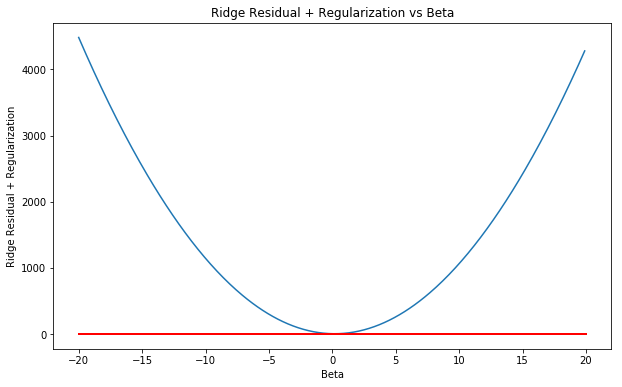

In [42]:
import numpy as np
import matplotlib.pyplot as plt

y = 2
_lambda = 10
print(y/(1 + _lambda))
beta = np.arange(-20,20, 0.1)
ridge  = (y-beta)**2 + _lambda*(beta)**2

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

plt.plot(beta, ridge)
plt.plot([-20, 20], [(y/(1 + _lambda)), (y/(1 + _lambda))], 'k-', color='r', lw=2) # Plot of solution

ax.set_xlabel('Beta')
ax.set_ylabel('Ridge Residual + Regularization')
ax.set_title('Ridge Residual + Regularization vs Beta')

plt.show()

(b) Consider (6.13) with p = 1. For some choice of $y_1$ and λ > 0, plot (6.13) as a function of $\beta_1$. Your plot should confirm that (6.13) is solved by (6.15).

<b>Sol:</b> Equation (6.15) is given as:

$$
\begin{equation}
  \beta_j^L=\left\{
  \begin{array}{@{}ll@{}}
    y_j - \lambda/2, & \text{if}\ y_j > \lambda/2 \\
    y_j + \lambda/2, & \text{if}\ y_j < -\lambda/2 \\
    1, & \text{if} \ |y_j| \leq \lambda/2
  \end{array}\right.
\end{equation}
$$

The plot is shown below. The red line shows the plot of the solution for the lasso in this case (solution is $y_j - \lambda/2$). It is evident that the line crosses through the minimum error value.

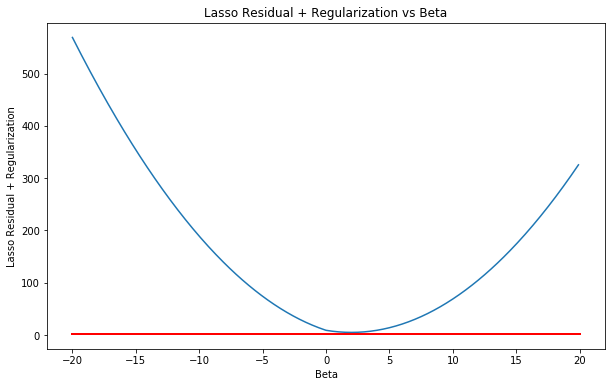

In [43]:
y= 3
_lambda = 2
lasso  = (y-beta)**2 + _lambda*np.absolute(beta)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

plt.plot(beta, lasso)
plt.plot([-20, 20], [y-_lambda/2, y-_lambda/2], 'k-', color='r', lw=2) # Plot of solution

ax.set_xlabel('Beta')
ax.set_ylabel('Lasso Residual + Regularization')
ax.set_title('Lasso Residual + Regularization vs Beta')

plt.show()

#### Applied

Q8. In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

(a) Use the rnorm() function to generate a predictor X of length n = 100, as well as a noise vector  of length n = 100.

In [331]:
import numpy as np

np.random.seed(5)
X = np.random.normal(0, 1, 100)
e = np.random.normal(0, 1, 100)

(b) Generate a response vector Y of length n = 100 according to the model $Y = β_0 + β_1X + β_2X^2 + β_3X^3 + \epsilon$, where $β_0, β_1, β_2,$ and $β_3$ are constants of your choice.

In [332]:
beta0 = 5
beta1 = 2
beta2 = 3
beta3 = 4

y = beta0 + beta1*X + beta2*(X**2) + beta3*(X**3) + e

(c) Use the regsubsets() function to perform best subset selection in order to choose the best model containing the predictors $X,X^2, . . ., X^{10}$. What is the best model obtained according to $C_p$, BIC, and adjusted $R^2$? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the data.frame() function to create a single data set containing both X and Y .

<b>Sol:</b> Test MSE is minimum for model with size <b>3</b> and having predictors <b>[0, 1, 2]</b>, which is perfectly in accordance with the generated data.

In [333]:
import itertools as it
from sklearn.linear_model import LinearRegression

def select_subset_sizeK(X_, y_, k):
    model = LinearRegression()
    best_score = 0.0
    M_k = []
    for combo in it.combinations(range(X_.shape[1]), k):
        X = X_[:, list(combo)]
        model.fit(X, y_)
        s = model.score(X, y_)
        if s > best_score:
            M_k = list(combo)
            best_score = s
    return M_k

def subset_selection(X_, y_):
    # Fit model with intercept only (Null model)
    train_MSE = {}
    model_cols = {}
    y_pred = np.mean(y_)
    train_MSE[0] = np.sum((y_ - y_pred)**2) / len(y_)
    for s in range(1, X_.shape[1]):
        cols = select_subset_sizeK(X_, y_, s)
        X = X_[:, cols]
        model = LinearRegression()
        model.fit(X, y_)
        y_pred = model.predict(X)
        train_MSE[s] = mean_squared_error(y_pred, y_)
        model_cols[s] = cols
    return (model_cols, train_MSE)

Text(0.5,1,'Test MSE vs Model Size')

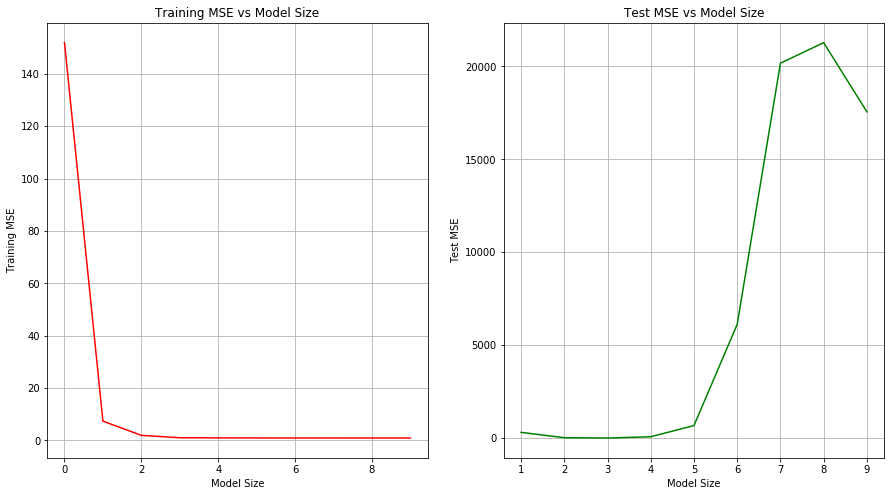

In [334]:
from sklearn.model_selection import train_test_split

X_ = np.vstack((X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10)).T
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.1)

t = subset_selection(X_train, y_train)
models = t[0]
train_MSE = t[1]

fig = plt.figure(figsize=(15, 8))

lists = sorted(train_MSE.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
ax = fig.add_subplot(121)
plt.plot(x, y, color='r')
plt.grid()
ax.set_xlabel('Model Size')
ax.set_ylabel('Training MSE')
ax.set_title('Training MSE vs Model Size')

test_MSE = {}
for size, cols in models.items():
    if size == 0:
        test_MSE[size] = np.sum((y_test - cols)**2) / len(y_test)
    else:
        model = LinearRegression()
        model.fit(X_train[:, cols], y_train)
        y_pred = model.predict(X_test[:, cols])
        test_MSE[size] = mean_squared_error(y_pred, y_test) 

lists = sorted(test_MSE.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
ax = fig.add_subplot(122)
plt.plot(x, y, color='g')
plt.grid()
ax.set_xlabel('Model Size')
ax.set_ylabel('Test MSE')
ax.set_title('Test MSE vs Model Size')

In [335]:
print("Test MSE is minimum for model size: " +str(min(test_MSE, key=test_MSE.get)))
cols = models.get(min(test_MSE, key=test_MSE.get))
print("Columns used in the model: " +str(cols))
model = LinearRegression()
model.fit(X_train[:, cols], y_train)
print("Model Coefficients: " +str(model.coef_))

Test MSE is minimum for model size: 3
Columns used in the model: [0, 1, 2]
Model Coefficients: [2.00715291 3.06050471 4.07996844]


(e) Now fit a lasso model to the simulated data, again using $X,X^2, . . ., X^{10}$ as predictors. Use cross-validation to select the optimal value of λ. Report the resulting coefficient estimates, and discuss the results obtained.

<b>Sol:</b> The lasso model has significant coefficients for predictors 0,1,2,3,4. All other coefficients are insignificant.

In [342]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.logspace(-10, 2, n_alphas)
# Leave one out cross-validation
model = LassoCV(alphas=alphas, fit_intercept=True, cv=None)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Test Error: " +str(mean_squared_error(y_test, predictions)))
print("Model coefficients: " + str(model.coef_))

Test Error: 4687.204168578645
Model coefficients: [ 1.83007496e+00  2.54077338e+00  3.91756182e+00  2.22585449e-01
  2.89062042e-01 -3.33340397e-02 -2.88216147e-02 -3.80527416e-03
 -9.90808115e-03  3.31479566e-03]


/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Q9. In this exercise, we will predict the number of applications received using the other variables in the College data set.

In [135]:
import pandas as pd

college = pd.read_csv("data/College.csv")
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(a) Split the data set into a training set and a test set.

In [136]:
college = college.rename(columns={'Unnamed: 0': 'Name'})
college['Private'] = college['Private'].map({'Yes': 1, 'No': 0})
msk = np.random.rand(len(college)) < 0.8
train = college[msk]
test = college[~msk]

(b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression(fit_intercept=True)
model.fit(train.drop(['Name', 'Apps'], axis=1), train['Apps'])
predictions = model.predict(test.drop(['Name', 'Apps'], axis=1))

print("Test Error: " +str(mean_squared_error(test['Apps'], predictions)))

Test Error: 1178528.8421813124


(c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [139]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
alphas = np.logspace(-10, 2, n_alphas)
# Leave one out cross-validation
model = RidgeCV(alphas=alphas, fit_intercept=True, cv=None, store_cv_values=True)
model.fit(train.drop(['Name', 'Apps'], axis=1), train['Apps'])

predictions = model.predict(test.drop(['Name', 'Apps'], axis=1))
print("Test Error: " +str(mean_squared_error(test['Apps'], predictions)))

Test Error: 1188298.4979038904


(d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [140]:
from sklearn.linear_model import LassoCV

# Leave one out cross-validation
model = LassoCV(alphas=alphas, fit_intercept=True, cv=None)
model.fit(train.drop(['Name', 'Apps'], axis=1), train['Apps'])

predictions = model.predict(test.drop(['Name', 'Apps'], axis=1))
print("Test Error: " +str(mean_squared_error(test['Apps'], predictions)))
print("Number of Non-zero coefficients: " + str(len(model.coef_)))

Test Error: 1207847.543688796
Number of Non-zero coefficients: 17


/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

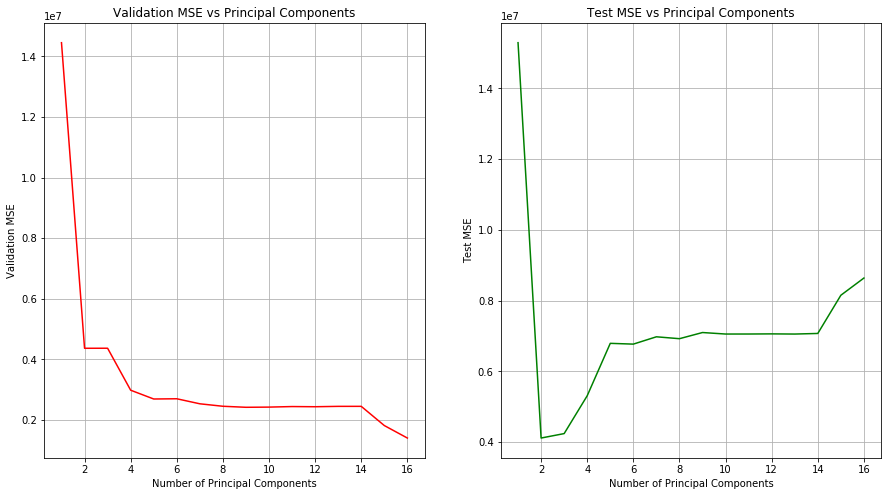

In [370]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def PCR_CV(X_train, Y_train, X_test, Y_test, M):
    X_train_scaled = preprocessing.scale(X_train)
    X_test_scaled = preprocessing.scale(X_test)
    
    MSE = {}
    test_MSE = {}
    
    for m in M: # Iterate over number of principal components
        pca = PCA(n_components=m)
        X_train_reduced = pca.fit_transform(X_train_scaled)
        X_test_reduced = pca.fit_transform(X_test_scaled)
        
        mse = 0
        test_mse = 0
        loo = LeaveOneOut() # Leave one out cross-validation
        for train_index, test_index in loo.split(X_train_reduced):
            X, X_CV = X_train_reduced[train_index], X_train_reduced[test_index]
            Y, Y_CV = Y_train[train_index], Y_train[test_index]
            model = LinearRegression(fit_intercept=True)
            model.fit(X, Y)
            p = model.predict(X_CV)
            mse += mean_squared_error(p, Y_CV)
        MSE[m] = mse/len(X_train_reduced)
        
        # Compute test MSE for the model
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train_reduced, Y_train)
        p = model.predict(X_test_reduced)
        test_MSE[m] = mean_squared_error(p, Y_test)
        
    # Plot validation MSE
    lists = sorted(MSE.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(121)
    plt.plot(x, y, color='r')
    plt.grid()
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('Validation MSE')
    ax.set_title('Validation MSE vs Principal Components')
    
    lists = sorted(test_MSE.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    ax = fig.add_subplot(122)
    plt.plot(x, y, color='g')
    plt.grid()
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('Test MSE')
    ax.set_title('Test MSE vs Principal Components')
    plt.show()
        
M = np.arange(1, 17, 1) # Principal components
PCR_CV(train.drop(['Name', 'Apps'], axis=1), train['Apps'].values, test.drop(['Name', 'Apps'], axis=1),
       test['Apps'], M)

(f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

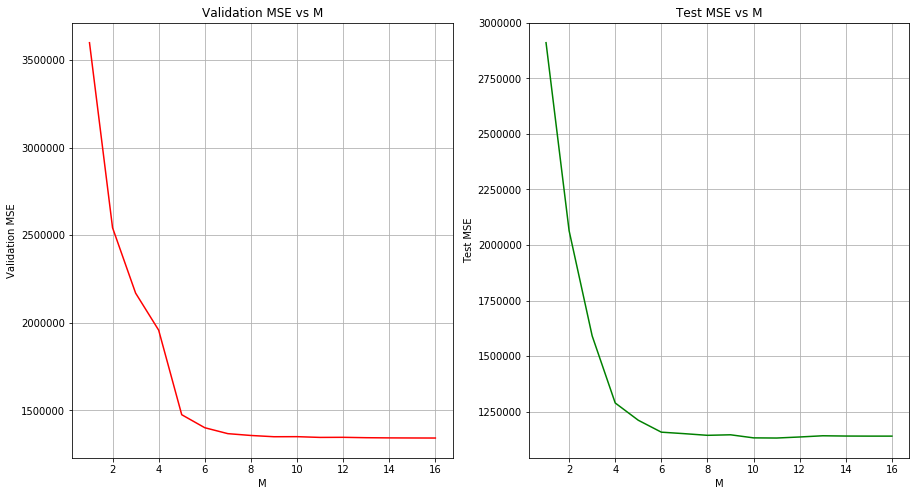

In [190]:
from sklearn.cross_decomposition import PLSRegression

def PLS_CV(X_train, Y_train, X_test, Y_test, M):
    X_train_scaled = preprocessing.scale(X_train)
    X_test_scaled = preprocessing.scale(X_test)
    
    MSE = {}
    test_MSE = {}
    
    for m in M: # Iterate over number of principal components
        mse = 0
        test_mse = 0
        loo = LeaveOneOut() # Leave one out cross-validation
        for train_index, test_index in loo.split(X_train_scaled):
            X, X_CV = X_train_scaled[train_index], X_train_scaled[test_index]
            Y, Y_CV = Y_train[train_index], Y_train[test_index]
            model = PLSRegression(n_components=m)
            model.fit(X, Y)
            p = model.predict(X_CV)
            mse += mean_squared_error(p, Y_CV)
        MSE[m] = mse/len(X_train_scaled)
        
        # Compute test MSE for the model
        model = PLSRegression(n_components=m)
        model.fit(X_train_scaled, Y_train)
        p = model.predict(X_test_scaled)
        test_MSE[m] = mean_squared_error(p, Y_test)
        
    # Plot validation MSE
    lists = sorted(MSE.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(121)
    plt.plot(x, y, color='r')
    plt.grid()
    ax.set_xlabel('M')
    ax.set_ylabel('Validation MSE')
    ax.set_title('Validation MSE vs M')
    
    lists = sorted(test_MSE.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    ax = fig.add_subplot(122)
    plt.plot(x, y, color='g')
    plt.grid()
    ax.set_xlabel('M')
    ax.set_ylabel('Test MSE')
    ax.set_title('Test MSE vs M')
    plt.show()
    
M = np.arange(1, 17, 1) # Principal components
PLS_CV(train.drop(['Name', 'Apps'], axis=1), train['Apps'].values, test.drop(['Name', 'Apps'], axis=1),
       test['Apps'], M)

(g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

<b>Sol:</b> The test errors (with order of magnitude $10^7$) for various methods are as follows:

 - Least squares linear model : <b>0.118</b>
 
 - Ridge regression model : <b>0.119</b>
 
 - Tha lasso: <b>0.121</b>
 
 - PCR: <b>0.67</b>
 
 - PLS: <b>0.11</b>
 
It can be conluded that all the other models perform well as compared to PCR.

Q10. We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

(a) Generate a data set with $p = 15$ features, $n = 1,000$ observations, and an associated quantitative response vector generated according to the model
$$Y = Xβ + \epsilon$$
where β has some elements that are exactly equal to zero.

In [239]:
X = np.random.normal(size=(1000, 15))
beta = np.random.normal(size=15)
beta[3] = 0
beta[5] = 0
beta[9] = 0
e = np.random.normal(size=1000)
y = np.dot(X, beta) + e

(b) Split your data set into a training set containing 100 observations and a test set containing 900 observations.

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

(c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

(d) Plot the test set MSE associated with the best model of each size.

Text(0.5,1,'Test MSE vs Model Size')

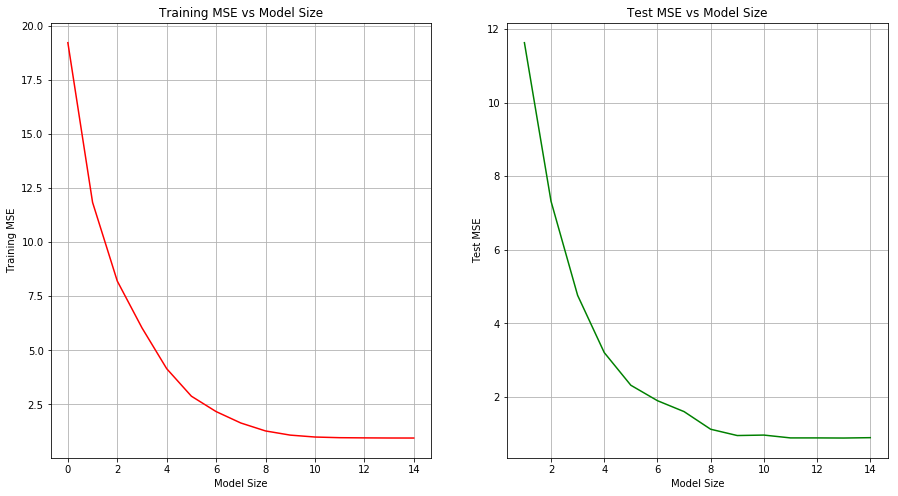

In [253]:
import itertools as it
from sklearn.linear_model import LinearRegression

def select_subset_sizeK(X_, y_, k):
    model = LinearRegression()
    best_score = 0.0
    M_k = []
    for combo in it.combinations(range(X_.shape[1]), k):
        X = X_[:, list(combo)]
        model.fit(X, y_)
        s = model.score(X, y_)
        if s > best_score:
            M_k = list(combo)
            best_score = s
    return M_k

def subset_selection(X_, y_):
    # Fit model with intercept only (Null model)
    train_MSE = {}
    model_cols = {}
    y_pred = np.mean(y_)
    train_MSE[0] = np.sum((y_ - y_pred)**2) / len(y_)
    for s in range(1, X_.shape[1]):
        cols = select_subset_sizeK(X_, y_, s)
        X = X_[:, cols]
        model = LinearRegression()
        model.fit(X, y_)
        y_pred = model.predict(X)
        train_MSE[s] = mean_squared_error(y_pred, y_)
        model_cols[s] = cols
    return (model_cols, train_MSE)

t = subset_selection(X_train, y_train)
models = t[0]
train_MSE = t[1]

fig = plt.figure(figsize=(15, 8))

lists = sorted(train_MSE.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
ax = fig.add_subplot(121)
plt.plot(x, y, color='r')
plt.grid()
ax.set_xlabel('Model Size')
ax.set_ylabel('Training MSE')
ax.set_title('Training MSE vs Model Size')

test_MSE = {}
for size, cols in models.items():
    if size == 0:
        test_MSE[size] = np.sum((y_test - cols)**2) / len(y_test)
    else:
        model = LinearRegression()
        model.fit(X_train[:, cols], y_train)
        y_pred = model.predict(X_test[:, cols])
        test_MSE[size] = mean_squared_error(y_pred, y_test) 

lists = sorted(test_MSE.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
ax = fig.add_subplot(122)
plt.plot(x, y, color='g')
plt.grid()
ax.set_xlabel('Model Size')
ax.set_ylabel('Test MSE')
ax.set_title('Test MSE vs Model Size')

(e) For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

In [264]:
print("Test MSE is minimum for model size: " +str(min(test_MSE, key=test_MSE.get)))

Test MSE is minimum for model size: 13


(f) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.

<b>Sol:</b> The model is well in accordance with the way data is generated, First of all, the columns that are not used for model generation are: <b>5, 9</b>. While generating data, we set the coefficients 3,5, and 9 to 0 and hence the model captures this well. Apart from this, the coefficient of feature 3 is <b>-0.07353929</b>, which is quite low as well.

In [265]:
cols = models.get(min(test_MSE, key=test_MSE.get))
print("Columns used in the model: " +str(cols))
model = LinearRegression()
model.fit(X_train[:, cols], y_train)
print("Model Coefficients: " +str(model.coef_))

Columns used in the model: [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14]
Model Coefficients: [-2.50852562 -0.43695144  1.40013156 -0.07353929 -0.85895357 -1.89061122
 -0.30136561  1.12543061  0.09474982 -0.70489182 -0.6278358  -1.40983561
  0.17529716]


Q11. We will now try to predict per capita crime rate in the Boston data set.

(a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

In [394]:
boston = pd.read_csv("data/Boston.csv")
boston.dropna(inplace=True)

In [395]:
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(boston.iloc[:,1:], boston['crim'], test_size=0.1)

# The lasso
n_alphas = 200
alphas = np.logspace(-10, 2, n_alphas)
# Leave one out cross-validation
model = LassoCV(alphas=alphas, fit_intercept=True, cv=None)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Test Error: " +str(mean_squared_error(y_test, predictions)))
print("Model coefficients: " + str(model.coef_))

Test Error: 54.95744135110768
Model coefficients: [ 0.04198738 -0.07640927 -0.         -0.          0.32159534 -0.00722933
 -0.67844741  0.5220804  -0.0022908  -0.09016879 -0.00174827  0.13527718
 -0.15964042]


In [396]:
# Ridge Regression
model = RidgeCV(alphas=alphas, fit_intercept=True, cv=None)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Test Error: " +str(mean_squared_error(y_test, predictions)))
print("Model coefficients: " + str(model.coef_))

Test Error: 55.55453079915659
Model coefficients: [ 0.0406467  -0.08234663 -0.20301002 -0.09532246  0.55364958 -0.00933135
 -0.70209263  0.52848777 -0.00235438 -0.14191045 -0.00127377  0.14595535
 -0.17415457]


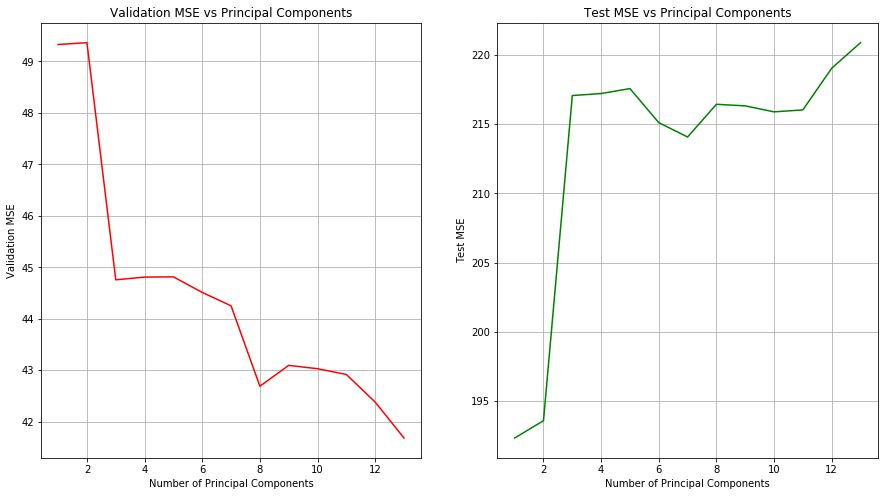

In [397]:
# PCR
M = np.arange(1, 14, 1) # Principal components
PCR_CV(X_train, y_train.values, X_test, y_test.values, M)

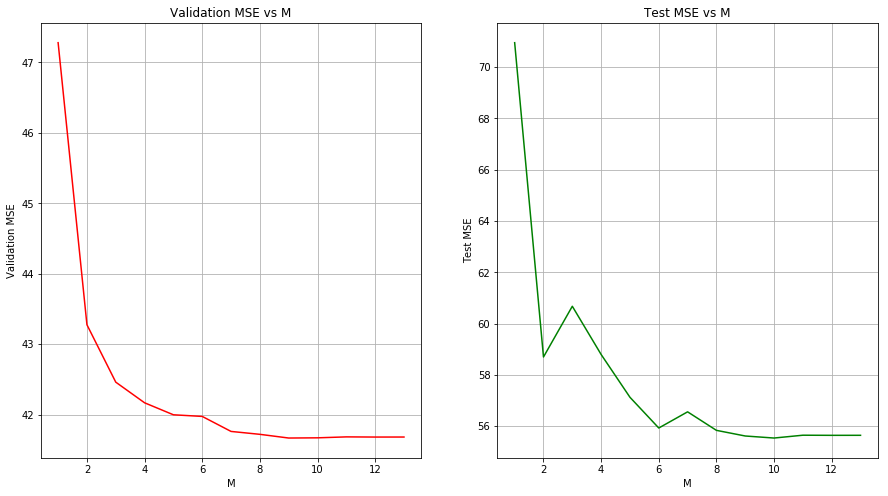

In [398]:
# PLS
M = np.arange(1, 14, 1) # Principal components
PLS_CV(X_train, y_train.values, X_test, y_test.values, M)

(b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, crossvalidation, or some other reasonable alternative, as opposed to using training error.

<b>Sol:</b> Except PCR, the lasso, PLS and ridge regression performs decently well.

(c) Does your chosen model involve all of the features in the data set? Why or why not?

<b>Sol:</b> If we look at the lasso model with test MSE of <b>54.95744</b>, the coefficients of <b>chas, nox</b> are 0 and those of age, tax and black are pretty low.